# Q & A Activity Week 14

### Submitted by: *Jayaram K, Fen Francis Pereira, Ashmina T.*

**Objective:** HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

How will you help this NGO to make a correct decision based on socio-economic and health factors?

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
data = pd.read_csv('Country-data.csv')

In [3]:
#displaying first 5 rows
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Feature description

- **country** : Name of the country
- **child_mort** : Death of children under 5 years of age per 1000 live births
- **exports** : Exports of goods and services per capita. Given as percentage of the GDP per capita
- **health** : Total health spending per capita. Given as percentage of GDP per capita
- **imports** : Imports of goods and services per capita. Given as percentage of the GDP per capita
- **income** : Net income per person
- **inflation** : The measurement of the annual growth rate of the Total GDP
- **life_expec** : The average number of years a new born child would live if the current mortality patterns are to remain the same
- **total_fer** : The number of children that would be born to each woman if the current age-fertility rates remain the same
- **gdpp** : The GDP per capita. Calculated as the Total GDP divided by the total population

In [4]:
data.shape

(167, 10)

The dataset consists of 167 rows and 10 columns.

In [5]:
#getting concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


All the features are numerical except the 'country' column which is categorical.

## Preprocessing

In [6]:
#checking for missing values
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There is no missing value in the dataset.

The features 'exports', 'imports', and 'health' are given as a percentage of the GDP per capita('gdpp' feature). This may lead to wrong decisions. If two countries are having same exports,imports, and income etc, we can't say that they are economically equal as long as their gdpp is different. So, we should convert those three columns into their actual values.

In [7]:
#transforming 'exports', 'imports', and 'health' columns
data['exports'] = data['exports'] * data['gdpp'] / 100
data['imports'] = data['imports'] * data['gdpp'] / 100
data['health'] = data['health'] * data['gdpp'] / 100

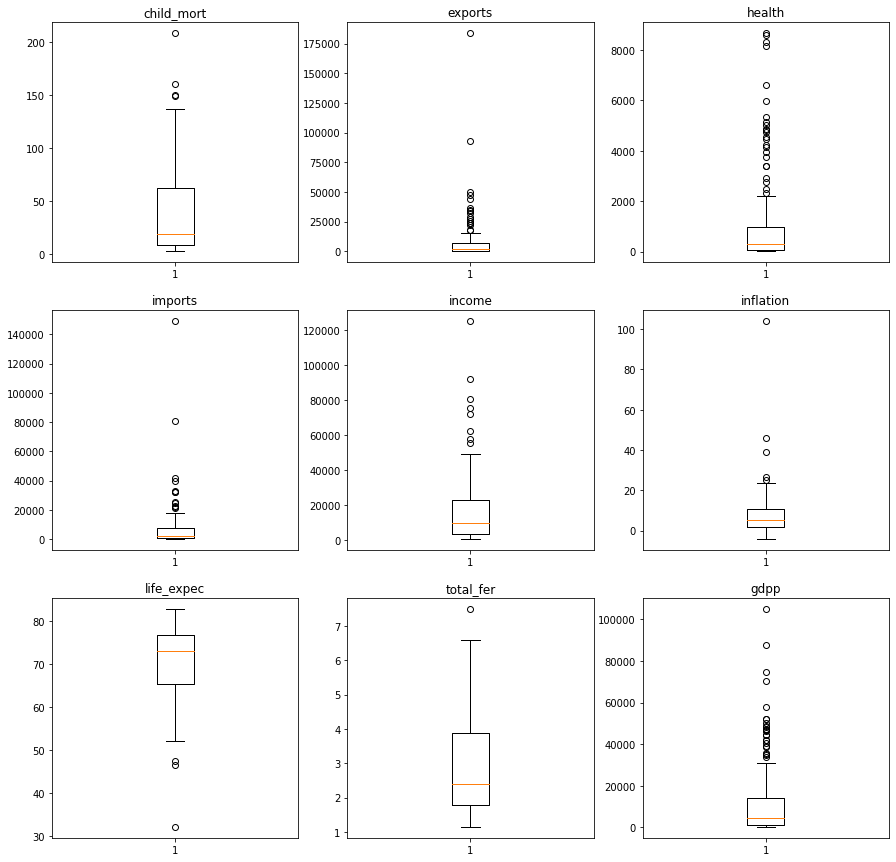

In [8]:
#checking for outliers
numerical = data.select_dtypes(exclude='object')
plt.figure(figsize=(15,15))
for i,feature in enumerate(numerical.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(data[feature])
    plt.title(feature)

There are outliers in every feature.  
Deleting the records containing outliers is not a feasible solution as the dataset is small. So, we can impute the outlier values by caping/flooring based on feature importance.  

- In case of 'child_mort' feature, there are outliers in upper side only and countries having higher child mortality rate will be in the direst need of aid as it indicates poverty or poor health conditions. So, we are going to keep the outlier as it is.
- In case of 'health', 'income', 'gdpp', and 'inflation' features, there are only upper side outliers. Higher values for these features indicates higher standard of living and better health-care services, and these countries need not be included in the list of least developed countries. So, we can cap these outliers at 99th percentile.
- In case of 'life_expec' feature, the outliers are in the lower side. Lower values in life expectancy indicates that may be the health-care service is poor or the country is hit by poverty. This improves the country's chance of being eligible for getting aid from the Help NGO. So, we are leaving these outliers as it is.

In [9]:
#sorting dataset by descending order of 'imports' column
data.sort_values(by='imports',ascending=False).head(4)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600


In [10]:
#sorting dataset by descending order of 'exports' column
data.sort_values(by='exports',ascending=False).head(4)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600


Upper most values or outliers in 'imports' and 'exports' features corresponds to the same countries. For these countries the exports are greater than imports, child mortality rate is low, life expectancy is high, gdpp and income are not that bad. This indicates they are self-sufficient. Surely these countries are going to be among the developed or developing countries list. So, caping the outliers in these two columns won't eliminate any eligible countries from our final list.

In [11]:
#handling outliers
features = ['exports','imports','health','income','gdpp','inflation']

for feature in features:
    #finding the 99th percentile
    cap_value = np.percentile(data[feature],99)
    #caping at 99th percentile
    data[feature] = np.where(data[feature]>cap_value,cap_value,data[feature])


In [12]:
#droping country column as it is categorical
num_data = data.drop('country',axis=1)

In [13]:
#statistical summary of the dataset
num_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.380970,70.555689,2.947964,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,7.793224,8.893172,1.513848,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.800000,7.490000,79088.000000


All the features are in different scales. So, we have to do feature scaling.

In [14]:
#standardisation
column = num_data.columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)
#converting it into a dataframe
scaled_data = pd.DataFrame(scaled_data,columns = column)

## Clustering

### K-Means Clustering

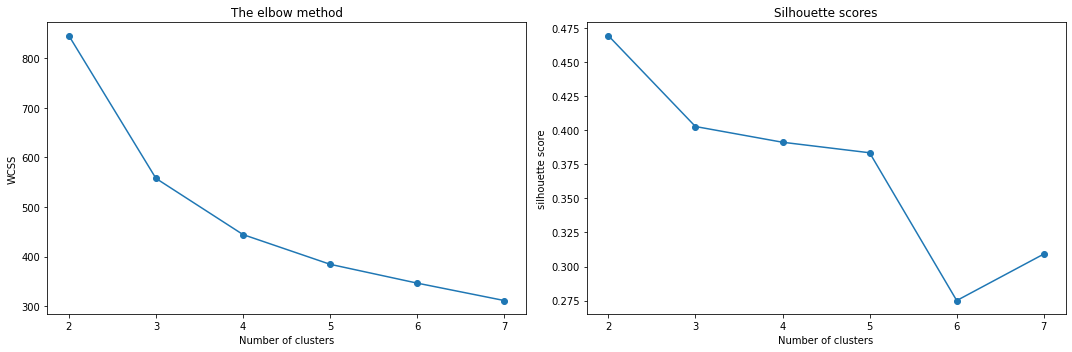

In [15]:
#applying kmeans on standardised data
from sklearn.cluster import KMeans
#elbow method to get optimal number of clusters
wcss = []
scores = []
for i in range(2,8):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    model=kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    labels = model.predict(scaled_data)
    sil_score = silhouette_score(scaled_data,labels)
    scores.append(sil_score)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(range(2,8),wcss,'-o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(range(2,8),scores,'-o')
plt.title('Silhouette scores')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.tight_layout()
plt.show()


Choosing the optimal number of clusters as 3 with silhouette score of 0.4

In [16]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
label_kmeans = kmeans.fit_predict(scaled_data)
label_kmeans

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [17]:
#assigning cluster labels to the original dataset
data['kmeans_label'] = label_kmeans

In [18]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [19]:
#number of countries per cluster
data['kmeans_label'].value_counts()

1    90
0    48
2    29
Name: kmeans_label, dtype: int64

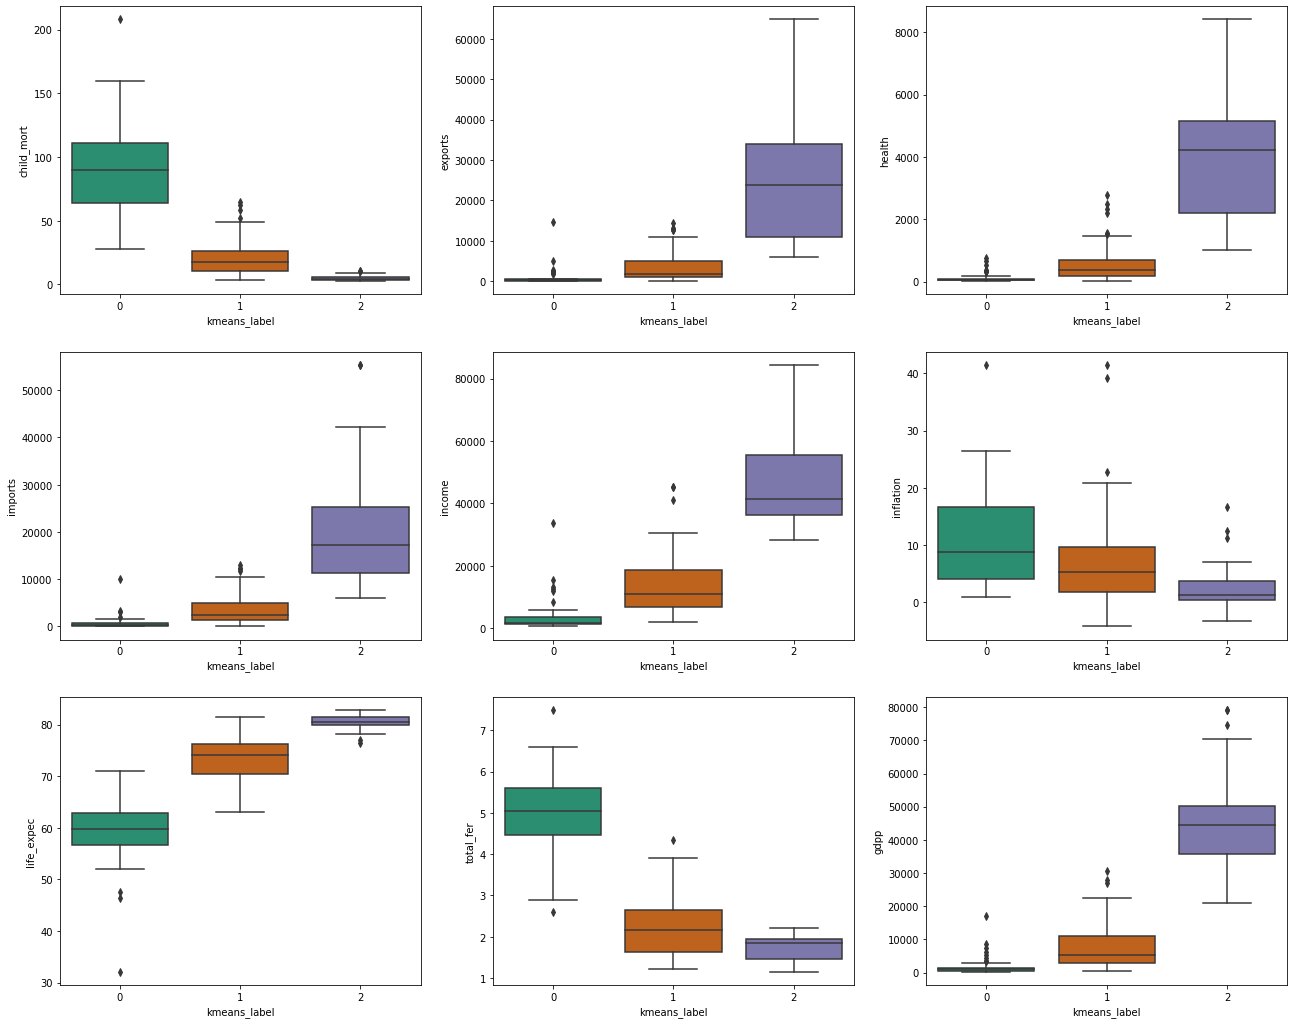

In [20]:
#boxplot
plt.figure(figsize=(22, 18))
for i,feature in enumerate(num_data):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='kmeans_label', y=feature, data=data, palette="Dark2")

plt.show()

<AxesSubplot:>

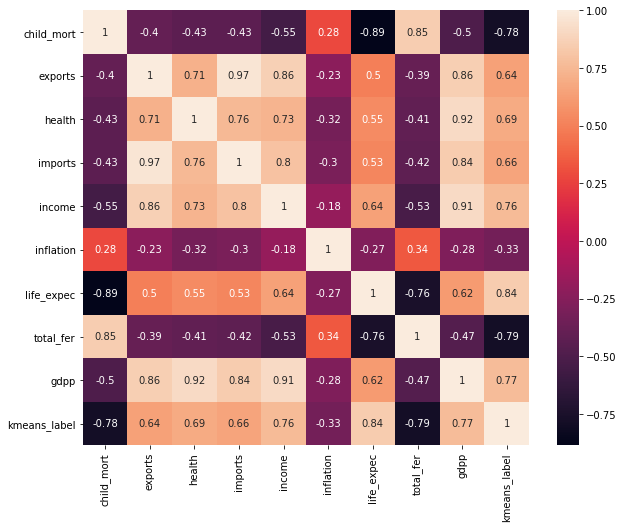

In [21]:
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

- 'child_mort' is highly correlated with 'life_expec' and 'total_fer'.
- 'gdpp' is highly correlated with 'exports', 'imports', and 'income'

So, taking 'gdpp' and 'child_mort' for finding the target cluster.

<AxesSubplot:xlabel='inflation', ylabel='child_mort'>

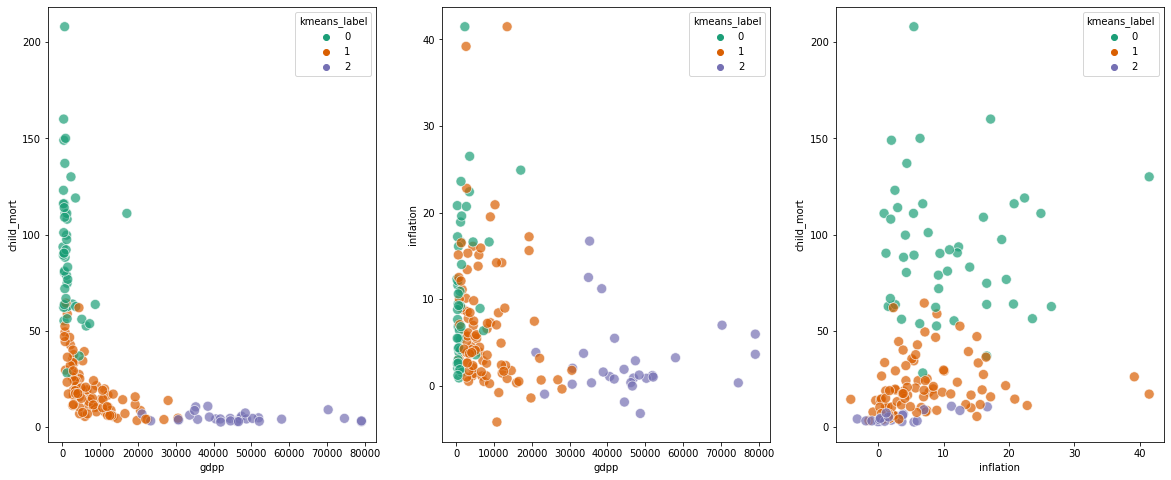

In [22]:
#scatter plot
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='kmeans_label',data=data, legend='full', palette="Dark2",s=100,alpha = 0.7)
plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='inflation', hue='kmeans_label',data=data, legend='full', palette="Dark2",s=100,alpha = 0.7)
plt.subplot(1, 3, 3)
sns.scatterplot(x='inflation', y='child_mort', hue='kmeans_label',data=data, legend='full', palette="Dark2",s=100,alpha = 0.7)

cluster 0 is having highest child mortality rate, inflation,total fertility and lowest GDP per capita, life expectancy, imports, exports, health spending per capita, income. so, cluster 0 contains the countries that are in direst need of aid.

In [23]:
#storing the countries that are in direst need of aid in a new dataframe
target_countries = data[data['kmeans_label']==0]
target_countries.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True],inplace=True)


In [24]:
len(target_countries)

48

There are 48 such countries.

In [25]:
#listing top 5 countries that are in direst need of aid
target_countries['country'].head(5)

26              Burundi
88              Liberia
37     Congo, Dem. Rep.
112               Niger
132        Sierra Leone
Name: country, dtype: object

##### Thanks.